# Importação Das Bibliotecas

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [56]:
def describe_dist_var(dataframe_1,dataframe_2,var):
    distancias_var = {}
        
    for periodo in range(52):
        aux = []
        for list_1 in dataframe_1[var]:
            for list_2 in dataframe_2[var]:
                aux.append(math.fabs(list_1[periodo]-list_2[periodo]))
        distancias_var[f'x{periodo+1}'] = aux

    return pd.DataFrame(distancias_var)

In [57]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(52):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [58]:
def describe_var_grafico(describe1_var,describe2_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe1_var.iloc[1,:],color='blue',label='Floresta Aleatória')
    plt.plot(range(52),describe2_var.iloc[1,:],color='red',label='Rede Neural')

    plt.xlabel('Componente de '+var)
    plt.ylabel('Valor Médio')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}Medio.png', format='png')
    plt.show()


In [59]:
def describe_var_desv_grafico(describe1_var,describe2_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe1_var.iloc[2,:],color='blue',label='Floresta Aleatória')
    plt.plot(range(52),describe2_var.iloc[2,:],color='red',label='Rede Neural')

    plt.xlabel('Componente de '+var)
    plt.ylabel('Desvio Padrão')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}FrdvioPadrao.png', format='png')
    plt.show()

In [60]:
def plot_dist(describe_dist_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe_dist_var.iloc[1,:])
    plt.xlabel('Componente de '+var)
    plt.ylabel('Distância Média')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}DistMedia.png', format='png')
    plt.show()

# Importação Dos Dados

In [61]:
resultados_1 = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_2 = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_sar.csv").iloc[:,1:]

In [62]:
resultados_dataframe_1 = {}
for column in range(len(resultados_1.columns[:-2])):
    coluna_aux = []
    for element in range(len((resultados_1.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_1.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_1[resultados_1.columns[column]] = coluna_aux

resultados_dataframe_1['ObjVal'] = resultados_1['ObjVal']


resultados_dataframe_1 = pd.DataFrame(resultados_dataframe_1)

In [63]:
resultados_dataframe_1

,x,s,ObjVal
0,"[9877.404296875, 9904.2919921875, 9926.2109375...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.040950e+07
1,"[9904.1240234375, 9921.4599609375, 9949.382812...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.041034e+07
2,"[9865.751953125, 9890.9169921875, 9911.578125,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.035495e+07


In [64]:
resultados_dataframe_2 = {}
for column in range(len(resultados_2.columns[:-2])):
    coluna_aux = []
    for element in range(len((resultados_2.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_2.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_2[resultados_2.columns[column]] = coluna_aux

resultados_dataframe_2['ObjVal'] = resultados_2['ObjVal']

resultados_dataframe_2 = pd.DataFrame(resultados_dataframe_2)

In [65]:
resultados_dataframe_2

,x,s,ObjVal
0,"[9925.6957472608, 9920.938361816821, 9873.0590...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.040665e+07
1,"[9925.6957472608, 9920.938361816821, 9873.0590...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.040665e+07
2,"[9925.6957472608, 9920.938361816821, 9873.0590...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.040665e+07


# Analise Dos Resultados

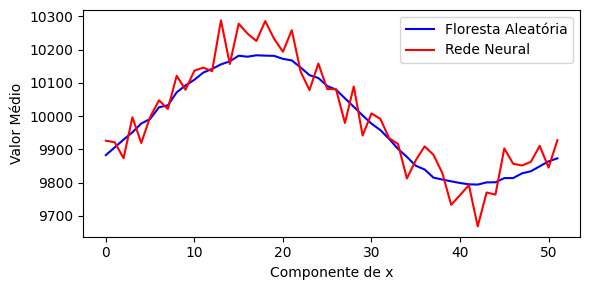

In [66]:
describe1_x = describe_var(resultados_dataframe_1,'x').describe()
describe2_x = describe_var(resultados_dataframe_2,'x').describe()

describe_var_grafico(describe1_x,describe2_x,'x')

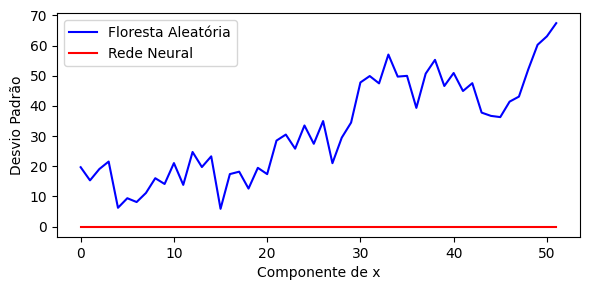

In [67]:
describe_var_desv_grafico(describe1_x,describe2_x,'x')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


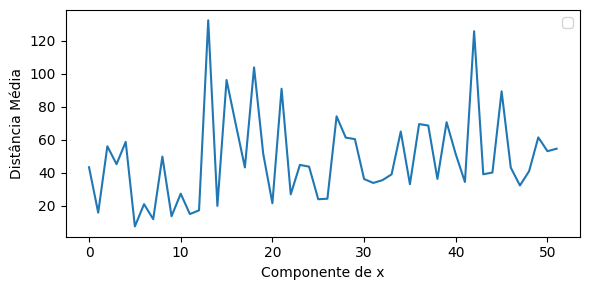

In [68]:
describe_x_3 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_2,'x').describe()
plot_dist(describe_x_3,'x') 

[]

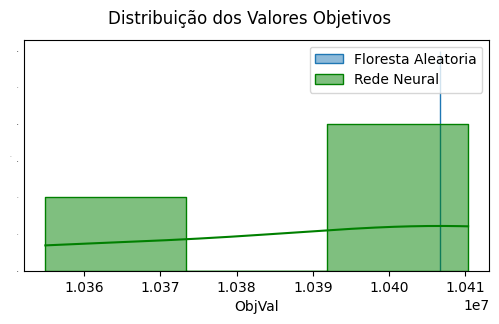

In [69]:
fig=plt.figure(figsize=(6,3))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.histplot(resultados_dataframe_2['ObjVal'], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(resultados_dataframe_1['ObjVal'], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.plot()

In [70]:
resultados_dataframe_1['ObjVal'].describe()

count    3.000000e+00
mean     1.039160e+07
std      3.173968e+04
min      1.035495e+07
25%      1.038222e+07
50%      1.040950e+07
75%      1.040992e+07
max      1.041034e+07
Name: ObjVal, dtype: float64

In [71]:
resultados_dataframe_2['ObjVal'].describe()

count    3.000000e+00
mean     1.040665e+07
std      0.000000e+00
min      1.040665e+07
25%      1.040665e+07
50%      1.040665e+07
75%      1.040665e+07
max      1.040665e+07
Name: ObjVal, dtype: float64